In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns

pd.options.display.max_rows = 8

In [2]:
import warnings
warnings.filterwarnings('ignore')

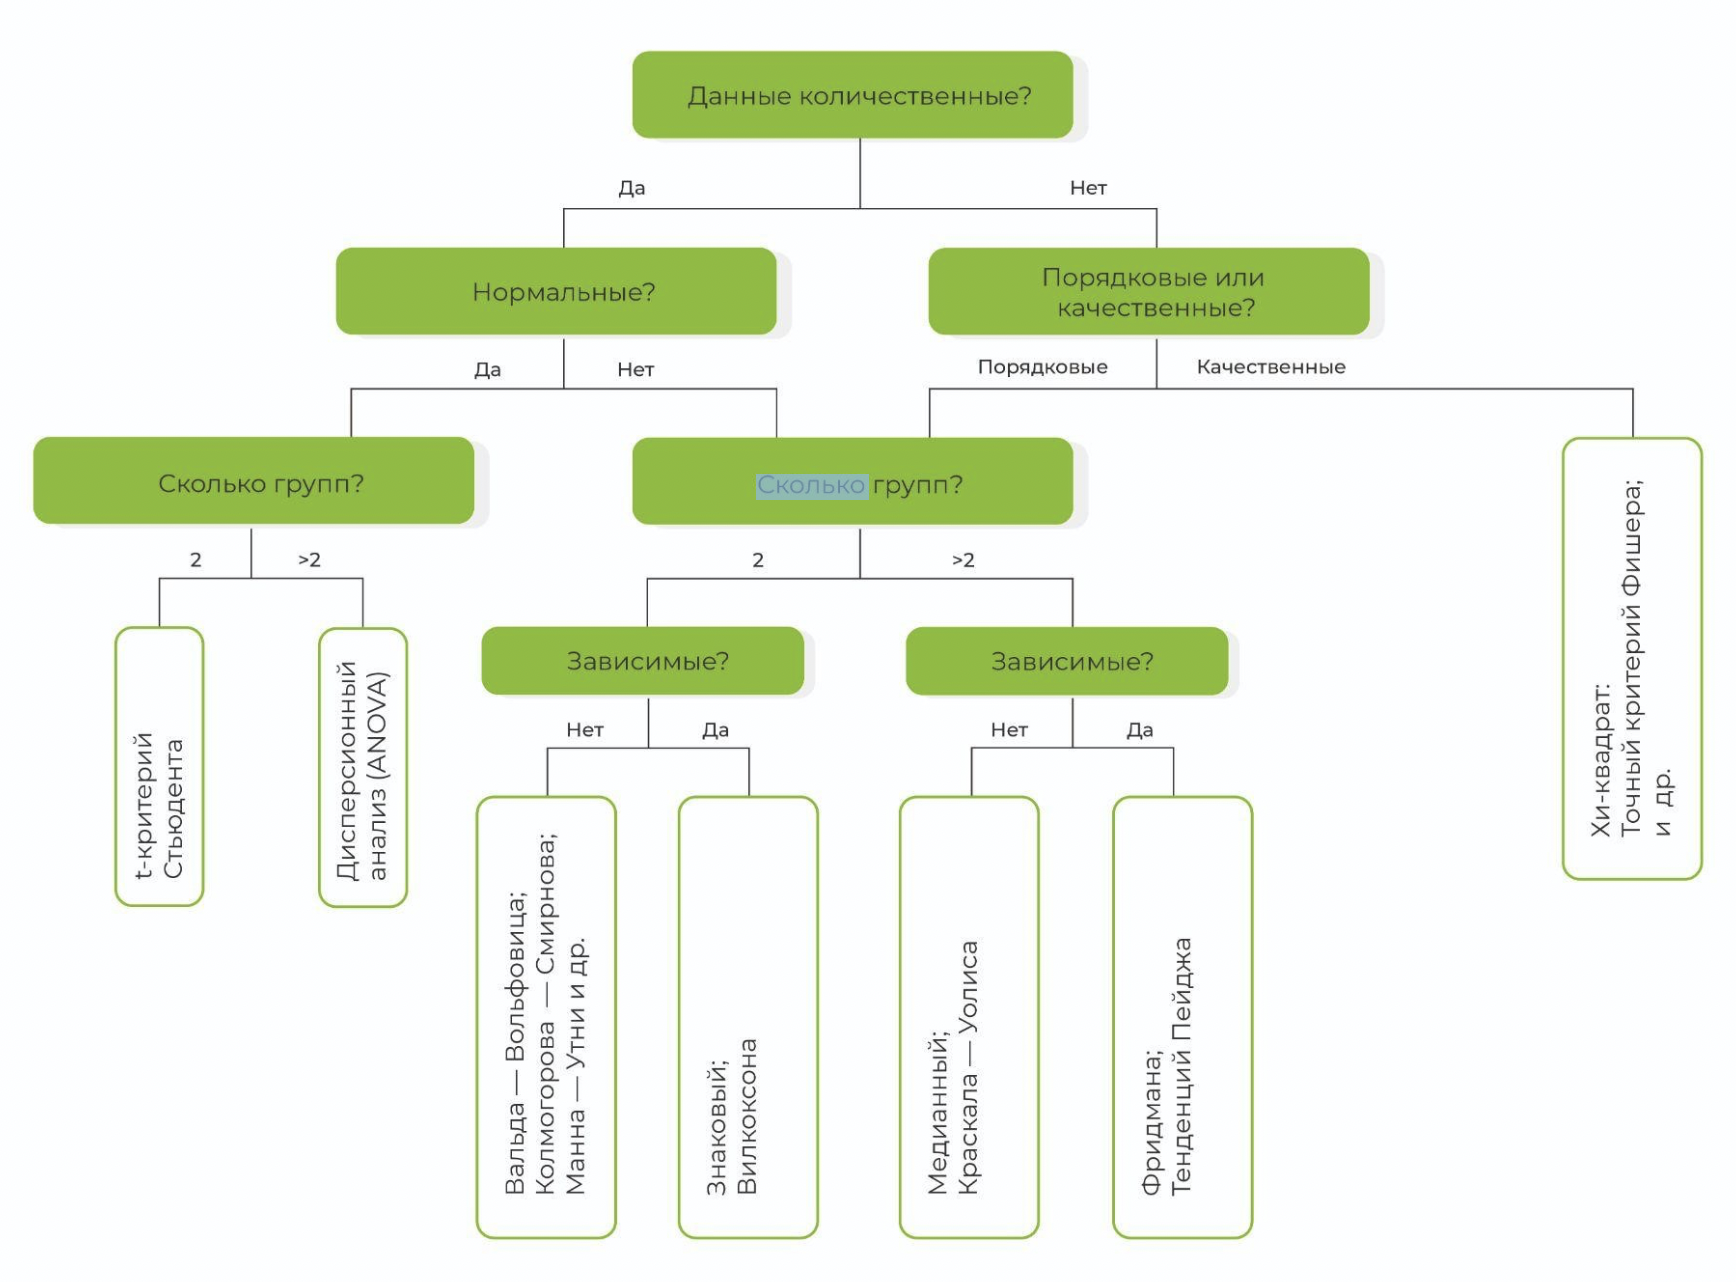

In [71]:
df = pd.read_csv("../data/Revenue.csv", sep=';')
df

,Day,Team,Revenue
0,1,T1,90238
1,2,T1,90680
2,3,T1,91924
3,4,T2,80626
...,...,...,...
38,4,T1,108376
39,5,T2,95194
40,6,T2,91224
41,7,T2,101210


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Day      42 non-null     int64 
 1   Team     42 non-null     object
 2   Revenue  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


<Axes: >

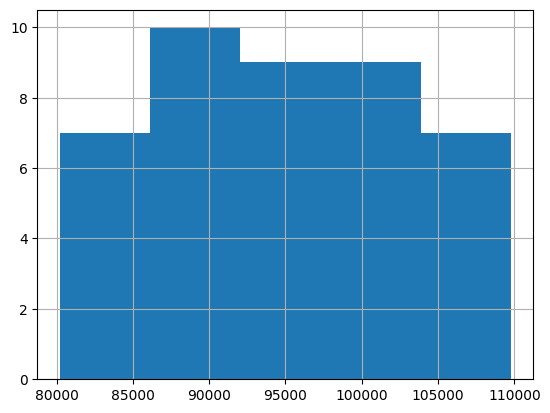

In [5]:
df['Revenue'].hist(bins=5)

In [6]:
df['Revenue'].describe()

count        42.000000
mean      95599.714286
std        7847.825271
min       80216.000000
25%       90801.000000
50%       95833.000000
75%      102211.500000
max      109764.000000
Name: Revenue, dtype: float64

In [7]:
stats.shapiro(df['Revenue'])

ShapiroResult(statistic=np.float64(0.9674295143862031), pvalue=np.float64(0.2700246718519493))

# Сравнение групп

In [8]:
df.groupby('Team')[['Revenue']].mean()

,Revenue
Team,
T1,97356.380952
T2,93843.047619


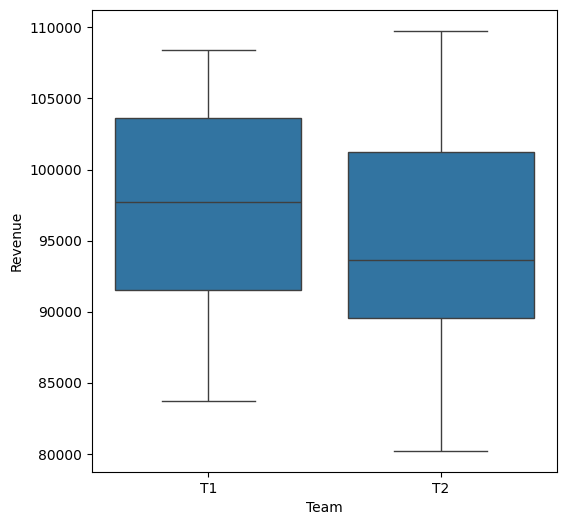

In [9]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Team', y='Revenue', data=df)

In [ ]:
print(df['Team'].value_counts())
for t in df['Team'].value_counts().keys():
    df_t = df[df['Team'] == t]
    print(t, stats.shapiro(df_t['Revenue']))
# при разбиении выборка нормальность сохраняет

Team
T1    21
T2    21
Name: count, dtype: int64
T1 ShapiroResult(statistic=np.float64(0.9478206581609357), pvalue=np.float64(0.3096141422993396))
T2 ShapiroResult(statistic=np.float64(0.9718254097514074), pvalue=np.float64(0.7730532024791663))


In [15]:
df_T1 = df[df['Team']=="T1"]
df_T2 = df[df['Team']=="T2"]

In [ ]:
# сравнение разбросов, 
# принимается гипотеза о равенстве дисперсий так как pvalue=0.714
scipy.stats.levene(df_T1['Revenue'],df_T2['Revenue'])

LeveneResult(statistic=np.float64(0.13571891958327284), pvalue=np.float64(0.7145172453451625))

In [75]:
# t критерий Стюдента (ind индепендент-независимые), так как приняли равенство дисперсий
scipy.stats.ttest_ind(df_T1['Revenue'],df_T2['Revenue']) # equal_var = False/True # Welch (если удалить выбросы)
# pvalue = 0.149 нет отличий (нулевая гипотеза подтверждается)

TtestResult(statistic=np.float64(1.4711076963525593), pvalue=np.float64(0.1490858432283997), df=np.float64(40.0))

In [76]:
df.groupby('Day')[['Revenue']].mean()

,Revenue
Day,
1,91773.000000
2,89982.666667
3,91760.333333
4,92381.666667
5,99417.000000
6,101738.333333
7,102145.000000


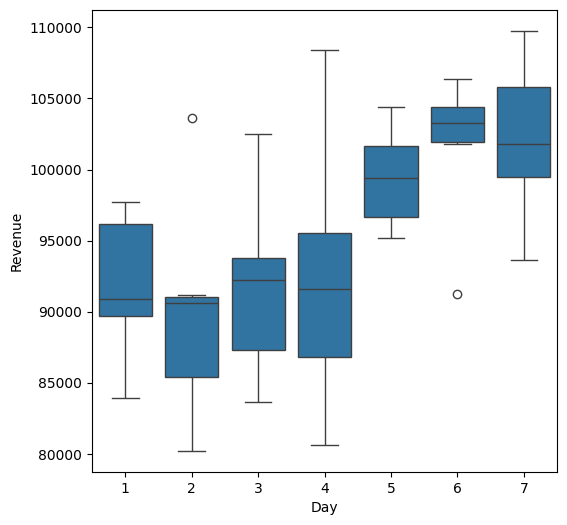

In [19]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Day', y='Revenue', data=df)

In [20]:
df_D1=np.array(df[df['Day']==1]['Revenue'])
df_D2=np.array(df[df['Day']==2]['Revenue'])
df_D3=np.array(df[df['Day']==3]['Revenue'])
df_D4=np.array(df[df['Day']==4]['Revenue'])
df_D5=np.array(df[df['Day']==5]['Revenue'])
df_D6=np.array(df[df['Day']==6]['Revenue'])
df_D7=np.array(df[df['Day']==7]['Revenue'])

In [39]:
# одинаковы ли разбросы/вариативности в этих совокупностях
stats.levene(df_D1, df_D2, df_D3, df_D4, df_D5, df_D6, df_D7)

LeveneResult(statistic=np.float64(0.4645393159922231), pvalue=np.float64(0.8297006590875525))

In [78]:
stats.f_oneway(df_D1, df_D2, df_D3, df_D4, df_D5, df_D6, df_D7) # One way ANOVA
# есть значимые отличия, так как pvalue=0.00498

F_onewayResult(statistic=np.float64(3.814203412845073), pvalue=np.float64(0.00498499763427808))

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [79]:
# синтаксис языка R
# метод наименьших квадратов
mod1=ols('Revenue~C(Day)', data=df).fit()

In [80]:
#anova_res1 = sm.stats.anova_lm(mod1)
anova_res1 = sm.stats.anova_lm(mod1, typ=2)
anova_res1

,sum_sq,df,F,PR(>F)
C(Day),9.983203e+08,6.0,3.814203,0.004985
Residual,1.526802e+09,35.0,NaN,NaN


In [81]:
# синтаксис языка R
mod2=ols('Revenue~C(Day)+C(Team)', data=df).fit()

In [ ]:
anova_res2 = sm.stats.anova_lm(mod2, typ=2)
anova_res2
# PR(>F) = 0.084696 следовательно бригада не влияет
# PR(>F) = 0.003626 следовательно день влияет

,sum_sq,df,F,PR(>F)
C(Day),9.983203e+08,6.0,4.048931,0.003626
C(Team),1.296069e+08,1.0,3.153913,0.084696
Residual,1.397196e+09,34.0,NaN,NaN


In [83]:
# первый кат фактор + второй кат фактор + эффект взаимодействия 
mod3=ols('Revenue~C(Day) + C(Team) + C(Team) * C(Day)', data=df).fit()

In [ ]:
anova_res3 = sm.stats.anova_lm(mod3, typ=2)
anova_res3
# PR(>F)= 0.839 отсутствие эфф взаимодействия

,sum_sq,df,F,PR(>F)
C(Day),9.983203e+08,6.0,3.655634,0.008329
C(Team),1.296069e+08,1.0,2.847554,0.102624
C(Team):C(Day),1.227714e+08,6.0,0.449562,0.839067
Residual,1.274424e+09,28.0,NaN,NaN


Следовательно не важно какая бригада и какая бригада в какой день, но какой день важно

In [31]:
dfs=df[(df['Day']<=4)]

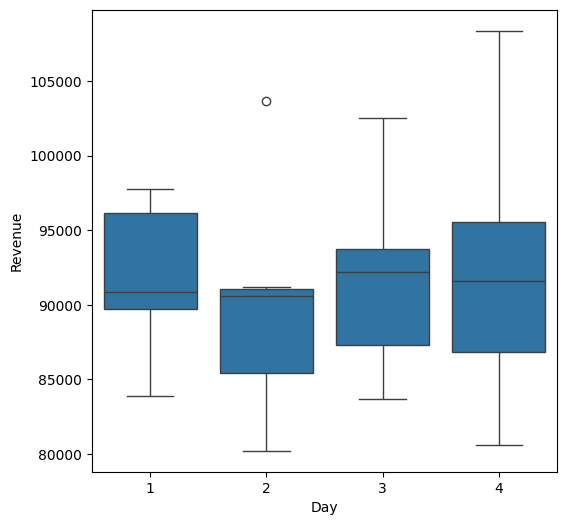

In [32]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Day', y='Revenue', data=dfs)

In [33]:
mod0=ols('Revenue~C(Day)', data=dfs).fit()

In [34]:
anova_res0 = sm.stats.anova_lm(mod0, typ=2)
anova_res0

,sum_sq,df,F,PR(>F)
C(Day),1.931593e+07,3.0,0.111923,0.952117
Residual,1.150545e+09,20.0,NaN,NaN


In [35]:
dfw=df[(df['Day'] > 4)]

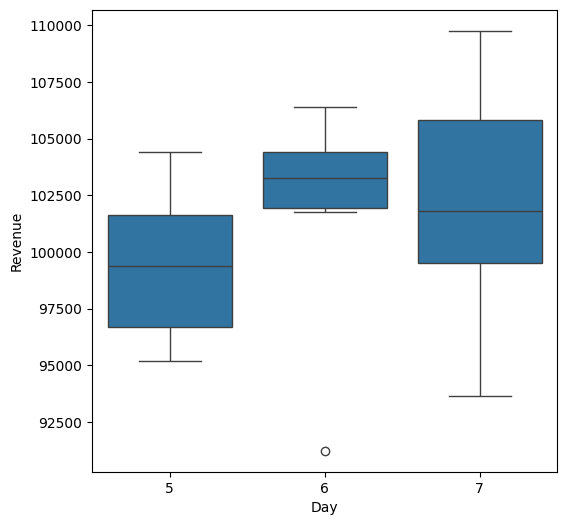

In [36]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Day', y='Revenue', data=dfw)

In [37]:
modw=ols('Revenue~C(Day)', data=dfw).fit()

In [38]:
anova_w = sm.stats.anova_lm(modw, typ=2)
anova_w

,sum_sq,df,F,PR(>F)
C(Day),2.599190e+07,2.0,0.518101,0.605931
Residual,3.762573e+08,15.0,NaN,NaN


# Связи факторов

In [42]:
df = pd.read_csv("../data/Ap_Rent_2023.csv", sep=';')
df

,rent,s,floor,rooms,district,walls,furniture
0,27500,35.0,5,1,3,1,1
1,29800,31.0,2,1,2,0,1
2,32000,30.0,4,1,3,1,1
3,50000,55.0,1,2,3,1,1
...,...,...,...,...,...,...,...
126,47800,54.0,1,2,1,1,1
127,34200,54.0,3,2,2,0,1
128,20800,12.0,4,1,3,1,0
129,34200,68.0,4,2,2,0,1


## Связь целевого показателя rent и категориальных факторов

In [69]:
df.groupby('walls')[['rent']].mean()

,rent
walls,
0,31312.244898
1,31932.500000


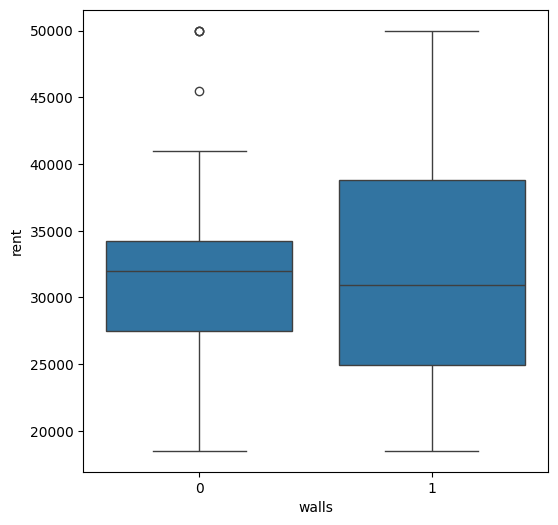

In [46]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='rent', data=df)

In [47]:
df_w0 = df[df['walls']==0]
df_w1 = df[df['walls']==1]
print(stats.shapiro(df_w0['rent']))
print(stats.shapiro(df_w1['rent']))

ShapiroResult(statistic=np.float64(0.933226739005949), pvalue=np.float64(0.007335253057037639))
ShapiroResult(statistic=np.float64(0.9402617266306064), pvalue=np.float64(0.000994610464608976))


In [ ]:
#scipy.stats.ttest_ind(df_w0['rent'],df_w1['rent']) # для нормального распределения
scipy.stats.mannwhitneyu(df_w0['rent'],df_w1['rent'])

MannwhitneyuResult(statistic=np.float64(2046.5), pvalue=np.float64(0.8251982325544291))

In [49]:
df.groupby('furniture')[['rent']].mean()

,rent
furniture,
0,23819.047619
1,33382.568807


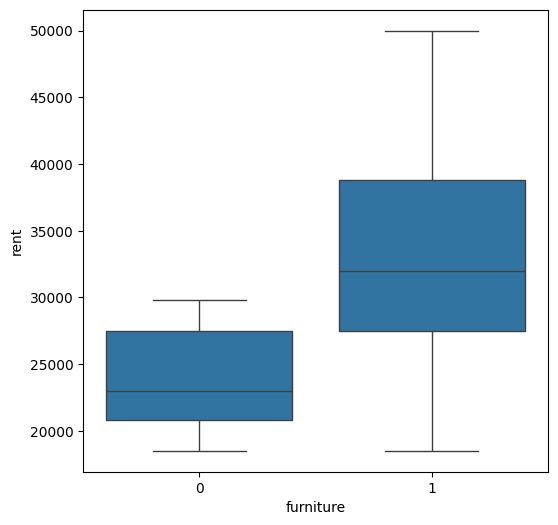

In [50]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='rent', data=df)

In [51]:
df_f0 = df[df['furniture']==0]
df_f1 = df[df['furniture']==1]
print(stats.shapiro(df_f0['rent']))
print(stats.shapiro(df_f1['rent']))

ShapiroResult(statistic=np.float64(0.8863639194506785), pvalue=np.float64(0.019205780415329037))
ShapiroResult(statistic=np.float64(0.956772358164383), pvalue=np.float64(0.0013654028689653987))


In [ ]:
#scipy.stats.ttest_ind(df_f0['rent'],df_f1['rent']) # для нормального распределения
scipy.stats.mannwhitneyu(df_f0['rent'],df_f1['rent'])

MannwhitneyuResult(statistic=np.float64(325.5), pvalue=np.float64(2.0462013181855786e-07))

In [53]:
df.groupby('district')[['rent']].mean()

,rent
district,
1,34844.736842
2,28065.909091
3,32914.583333


In [54]:
df.groupby('district')[['rent']].count()

,rent
district,
1,38
2,44
3,48


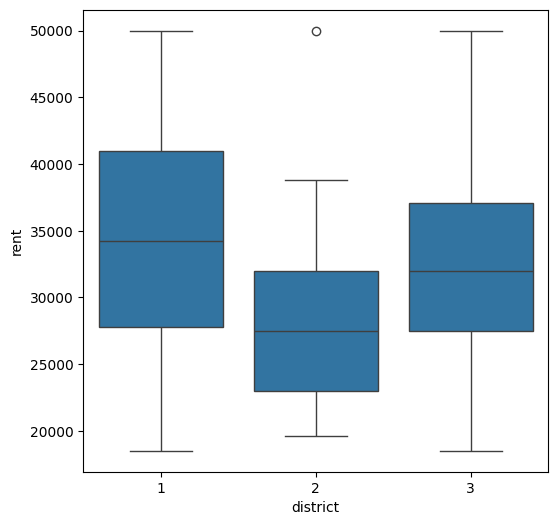

In [55]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=df)

In [56]:
df.loc[(df['rent'] == 50000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,50000,64.0,3,3,2,0,1


In [57]:
df=df.drop(df.index[[37]])

In [58]:
df_d1=np.array(df[df['district']==1]['rent'])
df_d2=np.array(df[df['district']==2]['rent'])
df_d3=np.array(df[df['district']==3]['rent'])

In [59]:
print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))

ShapiroResult(statistic=np.float64(0.970046434445831), pvalue=np.float64(0.3929214999846419))
ShapiroResult(statistic=np.float64(0.9329428475361966), pvalue=np.float64(0.01468633387684454))
ShapiroResult(statistic=np.float64(0.9478623691059476), pvalue=np.float64(0.032891007121348646))


In [60]:
#stats.f_oneway(df_d1,df_d2,df_d3) # One way ANOVA
stats.mstats.kruskalwallis(df_d1,df_d2,df_d3)

KruskalResult(statistic=np.float64(16.52600709960518), pvalue=np.float64(0.00025788326161446976))

## Связь количественного показателя s (площадь) и категориальных факторов

In [61]:
df.groupby('walls')[['s']].mean()

,s
walls,
0,39.042857
1,34.500000


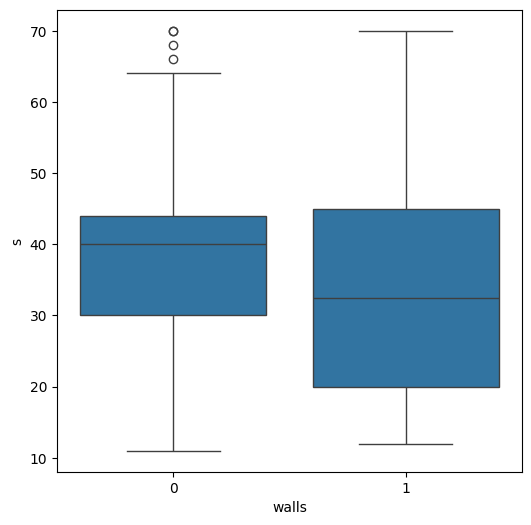

In [62]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='s', data=df)

In [63]:
print(stats.shapiro(df_w0['s']))
print(stats.shapiro(df_w1['s']))

ShapiroResult(statistic=np.float64(0.9625370666498104), pvalue=np.float64(0.1135511974608085))
ShapiroResult(statistic=np.float64(0.9499645396232249), pvalue=np.float64(0.003430828008902997))


In [64]:
scipy.stats.mannwhitneyu(df_f0['s'],df_f1['s'])

MannwhitneyuResult(statistic=np.float64(407.5), pvalue=np.float64(3.1081716140374413e-06))

In [65]:
df.groupby('furniture')[['s']].mean()

,s
furniture,
0,21.904762
1,39.010185


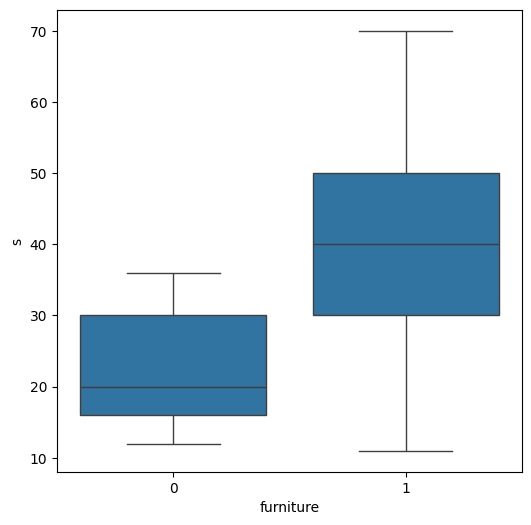

In [66]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='s', data=df)

In [67]:
scipy.stats.mannwhitneyu(df_f0['s'],df_f1['s'])

MannwhitneyuResult(statistic=np.float64(407.5), pvalue=np.float64(3.1081716140374413e-06))

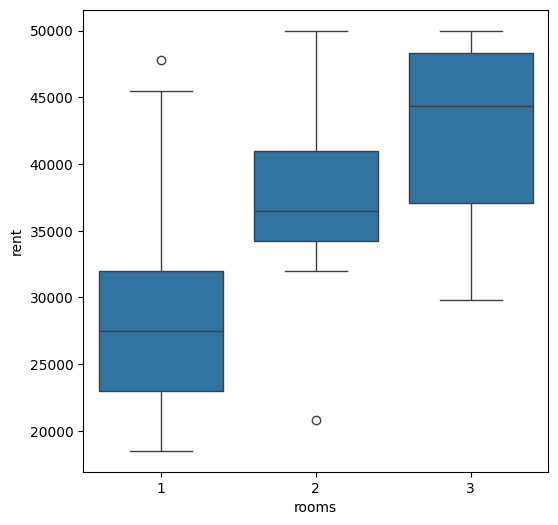

In [68]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='rooms', y='rent', data=df)